# Laboratorium 5 - MOwNiT2

Zadanie zajęć z dr Malawskim.
<br> https://www.icsr.agh.edu.pl/~malawski/dydakt/mownit/R/
<br> (seria 4: https://www.icsr.agh.edu.pl/~malawski/dydakt/mownit/)

In [16]:
install.packages("ggplot2")

library("ggplot2")

also installing the dependencies ‘glue’, ‘magrittr’, ‘stringi’, ‘colorspace’, ‘assertthat’, ‘utf8’, ‘stringr’, ‘labeling’, ‘munsell’, ‘R6’, ‘RColorBrewer’, ‘cli’, ‘fansi’, ‘pillar’, ‘pkgconfig’, ‘gtable’, ‘lazyeval’, ‘plyr’, ‘reshape2’, ‘rlang’, ‘scales’, ‘tibble’, ‘viridisLite’, ‘withr’




The downloaded binary packages are in
	/var/folders/v7/w7q47kqd06ngbj1926h_myl80000gp/T//RtmpdyqS0i/downloaded_packages


### Zadanie 1.
Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:
-  W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)).
-  Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)
-  Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy)
-  Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników. Słupki błędów można narysować korzystając z funkcji geom_errorbar pakietu ggplot2 . 
-  Uzyc aproksymacji wielomianowej dostepnej w jezyku R do znalezienia odpowiednich wielomianow, ktore najlepiej pasuja do wynikow kazdego z algorytmow. Dodac wykresy uzyskanych wielomianow do wykresu. 

In [71]:
c_results = read.csv("c_martix_multiplication_results.csv")
c_results

size,version,time
100,naive,0.005226
100,better,0.003746
200,naive,0.064865
200,better,0.045947
300,naive,0.252442
300,better,0.132272
400,naive,0.455146
400,better,0.257719
500,naive,1.183331
500,better,0.493899


In [72]:
c_results_with_mean = aggregate( time ~ version:size, data=c_results, FUN=mean)
c_results_with_mean

version,size,time
better,100,0.0038173
gsl,100,0.0008814
naive,100,0.0043378
better,200,0.0324216
gsl,200,0.0070040
naive,200,0.0539515
better,300,0.1076857
gsl,300,0.0226884
naive,300,0.1553147
better,400,0.2484451


In [73]:
c_results_with_mean$std = aggregate(time ~ version:size, data=c_results, FUN=sd)$time

c_results_with_mean_and_std = c_results_with_mean
c_results_with_mean_and_std

version,size,time,std
better,100,0.0038173,0.0002140737
gsl,100,0.0008814,0.0002767744
naive,100,0.0043378,0.0003369312
better,200,0.0324216,0.0048738249
gsl,200,0.0070040,0.0005784685
naive,200,0.0539515,0.0041799676
better,300,0.1076857,0.0088969856
gsl,300,0.0226884,0.0006192912
naive,300,0.1553147,0.0343350016
better,400,0.2484451,0.0041558298


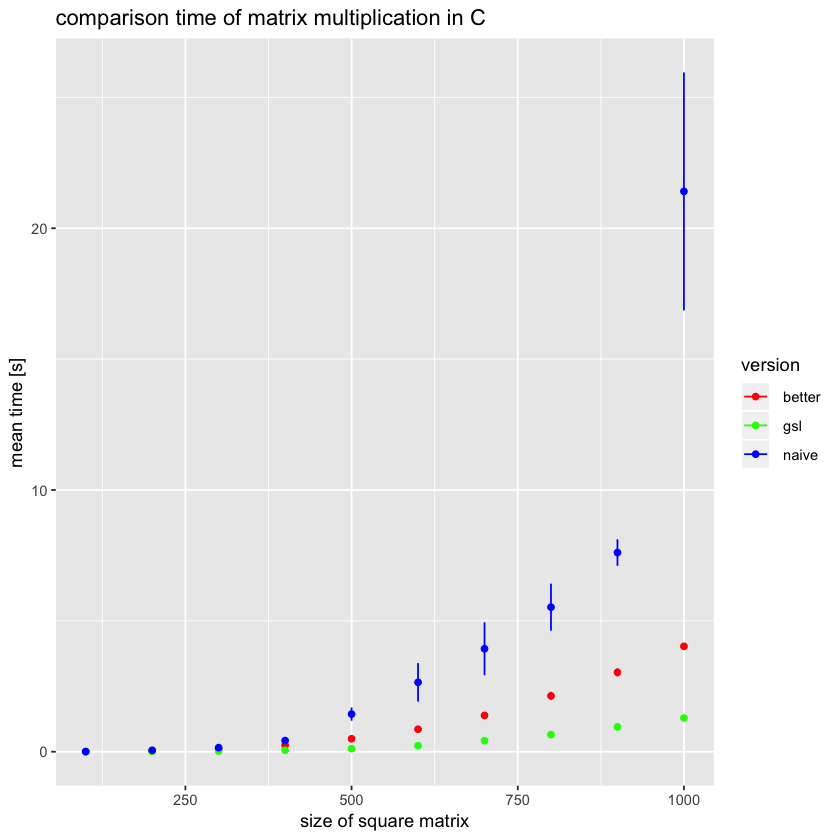

In [74]:
ggplot(c_results_with_mean_and_std, aes(size, time, color=version)) +
geom_errorbar(aes(ymin=time-std, ymax=time+std), width=.1) +
geom_point() +
ylab("mean time [s]") +
xlab("size of square matrix") +
ggtitle("comparison time of matrix multiplication in C") +
scale_color_manual(values=c("red", "green", "blue"))

In [75]:
naive = c_results_with_mean_and_std[c_results_with_mean_and_std$version==" naive",]
fit_naive = lm(time ~ poly(size, 3, raw=TRUE), data = naive)

better = c_results_with_mean_and_std[c_results_with_mean_and_std$version==" better",]
fit_better = lm(time ~ poly(size, 3, raw=TRUE), data = better)

gsl = c_results_with_mean_and_std[c_results_with_mean_and_std$version==" gsl",]
fit_gsl = lm(time ~ poly(size, 3, raw=TRUE), data = gsl)

fit_naive
fit_better
fit_gsl



Call:
lm(formula = time ~ poly(size, 3, raw = TRUE), data = naive)

Coefficients:
               (Intercept)  poly(size, 3, raw = TRUE)1  
                -4.126e+00                   4.319e-02  
poly(size, 3, raw = TRUE)2  poly(size, 3, raw = TRUE)3  
                -1.133e-04                   9.365e-08  



Call:
lm(formula = time ~ poly(size, 3, raw = TRUE), data = better)

Coefficients:
               (Intercept)  poly(size, 3, raw = TRUE)1  
                 6.827e-02                  -6.642e-04  
poly(size, 3, raw = TRUE)2  poly(size, 3, raw = TRUE)3  
                 1.471e-06                   3.184e-09  



Call:
lm(formula = time ~ poly(size, 3, raw = TRUE), data = gsl)

Coefficients:
               (Intercept)  poly(size, 3, raw = TRUE)1  
                 3.288e-02                  -2.813e-04  
poly(size, 3, raw = TRUE)2  poly(size, 3, raw = TRUE)3  
                 3.318e-07                   1.216e-09  


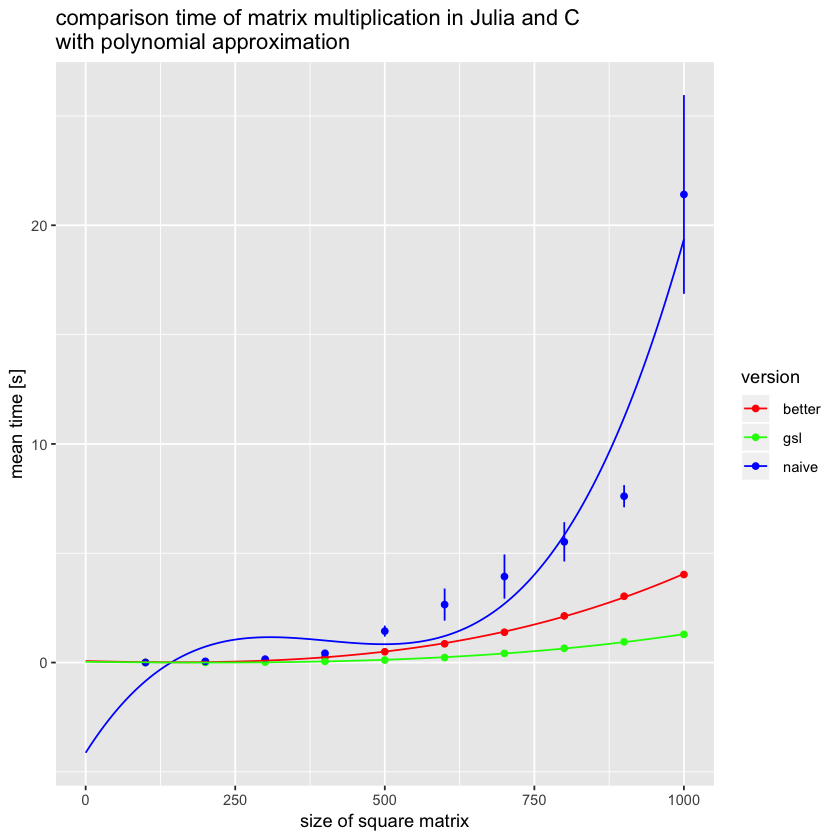

In [76]:
newdata_naive = data.frame(size = seq(0, 1000, length.out=400))
newdata_naive$time = predict(fit_naive, newdata_naive)

newdata_better = data.frame(size = seq(0, 1000, length.out=400))
newdata_better$time = predict(fit_better, newdata_better)

newdata_gsl = data.frame(size = seq(0, 1000, length.out=400))
newdata_gsl$time = predict(fit_gsl, newdata_gsl)

last_plot() + geom_line(data=newdata_naive, aes(size, time), color='blue') + 
geom_line(data=newdata_better, aes(size, time), color='red') + 
geom_line(data=newdata_gsl, aes(size, time), color='green') +
ggtitle("comparison time of matrix multiplication in Julia and C\nwith polynomial approximation")